# Data Science Job Postings and Salaries Analysis

The two datasets used in the mini-project are
- title_location_company_salary.xls
- Job_skills_qualifications.xls

---

## 1.  Problem Definition

Predict the **`salary`** of staffs using features in the two datasets.
- Analyze the `importance` of skills that can be of help in increasing the salary.
- Find the `anomalies` of salary among the staffs.

---

## 2. Dataset Preview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_salary = pd.read_excel("title_location_company_salary.xls", converters = {'Salary' : int})
df_skills = pd.read_excel("Job_skills_qualifications.xls")

In [3]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Job_ID   1287 non-null   int64 
 1   Title    1287 non-null   object
 2   Company  1285 non-null   object
 3   City     1116 non-null   object
 4   State    1287 non-null   object
 5   Salary   1209 non-null   object
 6   Levels   1287 non-null   object
dtypes: int64(1), object(6)
memory usage: 70.5+ KB


In [4]:
df_salary.head(10)

,Job_ID,Title,Company,City,State,Salary,Levels
0,0,Data Scientist,Numerdox,Sacramento,California,110000,Jr.
1,1,Data Analyst,Cepheid,Lodi,California,120000,Unknown
2,2,Data Scientist,Cepheid,Sunnyvale,California,150000,Staff
3,3,Data Scientist,Verana Health,San Francisco,California,150000,Unknown
4,4,Data Scientist,Tinder,San Francisco,California,130000,Jr.
5,5,Data Scientist,JPL/NASA,Pasadena,California,100000,Jr.
6,6,Data Scientist,IBM,San Jose,California,120000,Unknown
7,7,Data Scientist,Indeed,San Francisco,California,223000,Sr.
8,8,Data Scientist,Ezoic,Carlsbad,California,100000,Unknown
9,9,Data Scientist,City of Hope,NaN,California,NaN,Unknown


- The **`df_salary`** table shows the index, job title, company, city, state, salary and level for each staff.

In [5]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 256 entries, Job_ID to Calibration
dtypes: float64(255), int64(1)
memory usage: 2.5 MB


In [6]:
df_skills.head(5)

,Job_ID,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,Doctor of Philosophy,...,Scrum,VBA,Ceridian,MTA,New Relic,Sailpoint,DevOps,Backbone.js,Computer networking,Calibration
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- The **`df_skills`** table shows the skills status for each staff. `1` means `have` and `0` means `dont have`.

---

## 3. Data Cleaning / Preparation


1.  Delete the State column in the **`df_salary`** table, as `state` is always California.

In [7]:
df_salary = df_salary.drop(columns = ['State'])

2.  Drop the rows in which the `Salary` cell in **`df_salary`** table is empty or skills info is missing in **`df_skills`** table.

In [8]:
df_salary['Salary'].fillna(-1, inplace = True)
df_skills.fillna(-1, inplace = True)
drop_rows = []
count = df_salary.shape[0]
for i in range(0, count) :
    if (df_salary['Salary'][i] < 0) | (df_skills['R'][i] < 0) :
        drop_rows.append(i)
df_salary = df_salary.drop(drop_rows)
df_skills = df_skills.drop(drop_rows)

In [9]:
df_salary.head(10)

,Job_ID,Title,Company,City,Salary,Levels
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.
1,1,Data Analyst,Cepheid,Lodi,120000,Unknown
2,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff
3,3,Data Scientist,Verana Health,San Francisco,150000,Unknown
4,4,Data Scientist,Tinder,San Francisco,130000,Jr.
5,5,Data Scientist,JPL/NASA,Pasadena,100000,Jr.
6,6,Data Scientist,IBM,San Jose,120000,Unknown
7,7,Data Scientist,Indeed,San Francisco,223000,Sr.
8,8,Data Scientist,Ezoic,Carlsbad,100000,Unknown
10,10,Data Scientist,Airtable,San Francisco,130000,Unknown


3.  As some company and city cells in **`df_salary`** table are also empty, instead of dropping them, we replace them into `Unknown`.

In [10]:
df_salary['Company'].fillna('Unknown', inplace = True)
df_salary['City'].fillna('Unknown', inplace = True)

4.  As there're too many skills listed in the **`df_skills`** table, so we decide to select some skills instead of all. 
To achieve the target, we build **`df_count`** table for each skill with its total count of all staffs.

In [11]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1286
Columns: 256 entries, Job_ID to Calibration
dtypes: float64(255), int64(1)
memory usage: 2.4 MB


In [12]:
skills = df_skills.columns[1:]

In [13]:
sum_count = []
for i in skills:
    sum_count.append(sum(df_skills[i]))

In [14]:
df_count = pd.DataFrame()
df_count['skill'] = skills
df_count['skills_count'] = sum_count
df_count.describe()

,skills_count
count,255.000000
mean,35.658824
std,95.830997
min,0.000000
25%,2.000000
50%,5.000000
75%,23.500000
max,655.000000


<AxesSubplot:xlabel='skills_count', ylabel='Count'>

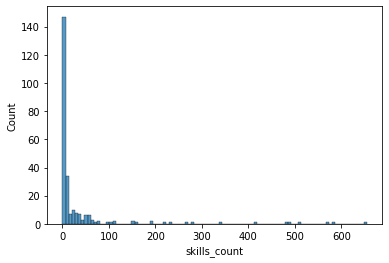

In [15]:
sns.histplot(data = df_count['skills_count'])

- Through the description and histogram of **`df_count`** table, we notice that the majority of skills' total count are less than `23.5` (75th percentile). Hence, we drop such skills and save the rest skills info into **`df_skills2`**.

In [16]:
df_count = df_count[df_count['skills_count'] > 23.5]

<AxesSubplot:ylabel='Count'>

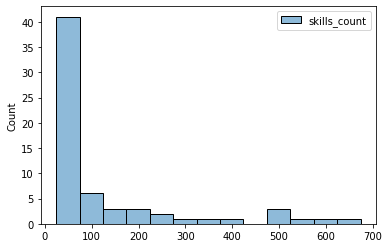

In [17]:
sns.histplot(data = df_count, binwidth = 50)

In [18]:
skills2 = list(df_count['skill'])
df_skills2 = df_skills[skills2].astype(int)
df_skills2['Job_ID'] = df_skills['Job_ID']

4.  Combine two tables **`df_salary`** and **`df_skills2`** based on `Job_ID` into our final table **`df_staff`**.

In [19]:
df_staff = df_salary.merge(df_skills2)
df_staff.head(5)

,Job_ID,Title,Company,City,Salary,Levels,Analysis skills,Communication skills,Research,R,...,Torch,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Analyst,Cepheid,Lodi,120000,Unknown,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Data Scientist,Verana Health,San Francisco,150000,Unknown,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Scientist,Tinder,San Francisco,130000,Jr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5.  Save the tables into excel files.

In [20]:
df_salary.to_excel('Salary.xlsx', index = False)
df_skills2.to_excel('Skills.xlsx', index = False)
df_staff.to_excel('Staff.xlsx', index = False)

---

## 4. Data Analysis / Visualization

1. Check the number of unique levels for categorical data to determine suitable visualisation tool

In [21]:
print("Number of unqiue classes in Title :", len(df_staff["Title"].unique()))
print("Number of unqiue classes in Company :", len(df_staff["Company"].unique()))
print("Number of unqiue classes in City :", len(df_staff["City"].unique()))
print("Number of unqiue classes in Levels :", len(df_staff["Levels"].unique()))

Number of unqiue classes in Title : 13
Number of unqiue classes in Company : 501
Number of unqiue classes in City : 77
Number of unqiue classes in Levels : 7


2. Visualisation for **`Job Titles`**

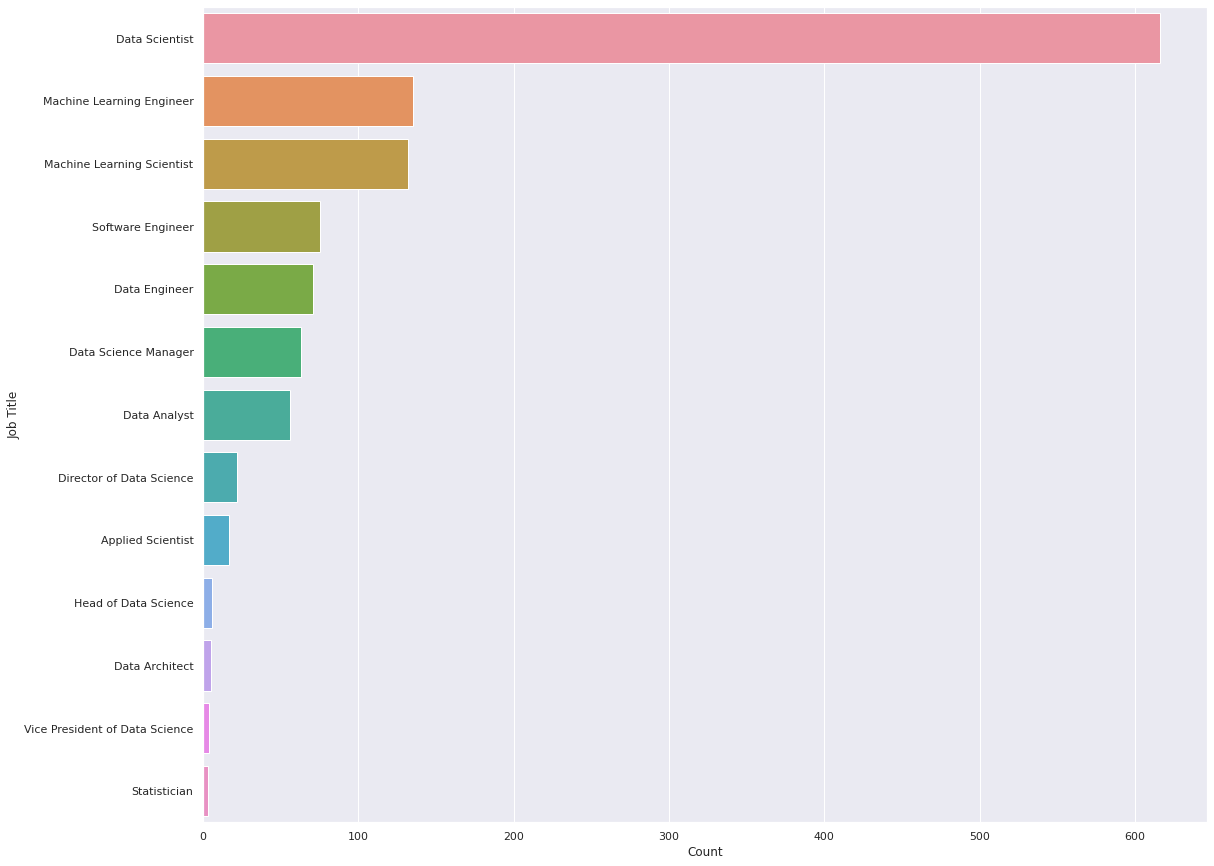

In [22]:
title_count = pd.DataFrame()
title_count = df_staff.loc[:,'Title'].value_counts()
title_count = title_count.to_frame()
title_count['Job Title'] = title_count.index
title_count = title_count.rename(columns = {'Title' : 'Count'})

plt.figure(figsize=(18, 15))
sns.set(font_scale = 1)
sns.barplot(data = title_count, x = 'Count', y = 'Job Title')
plt.show()

- In the countplot, the `Data Scientist` group is the most common occupation for our dataset by a significant margin, followed by `Machine Learning Engineer` and `Machine Learning Scientist`.

<AxesSubplot:xlabel='Salary', ylabel='Title'>

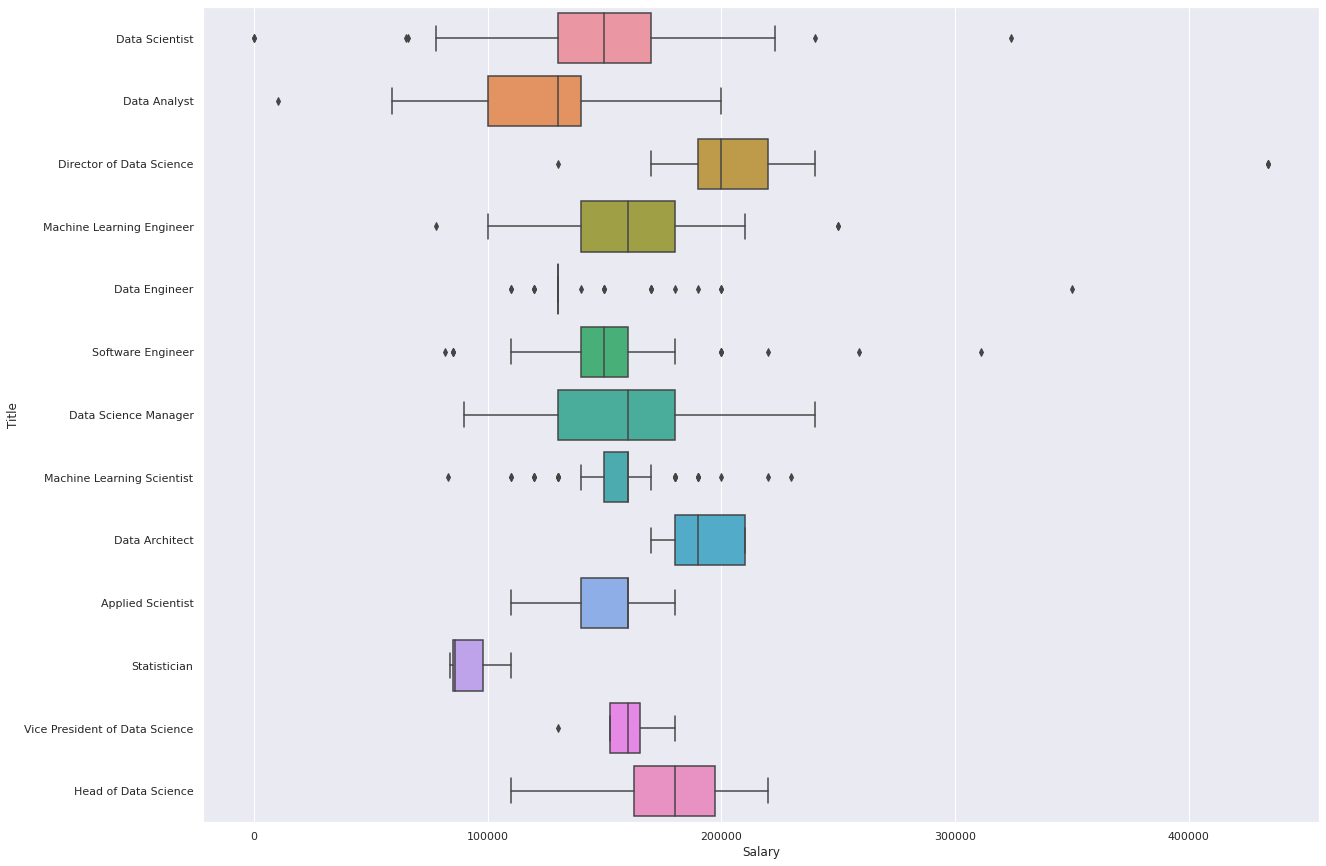

In [23]:
f, axes = plt.subplots(figsize=(20, 15))
sns.boxplot(x = 'Salary', y = 'Title', data = df_staff)

3. Visualisation for **`Company`**

In [24]:
company = pd.DataFrame(df_staff["Company"].value_counts())
company.describe()

,Company
count,501.000000
mean,2.405190
std,6.262387
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,103.000000


- Every company has a mean of only 1 employee, with 75% of companies having 2 or fewer employees.
- Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

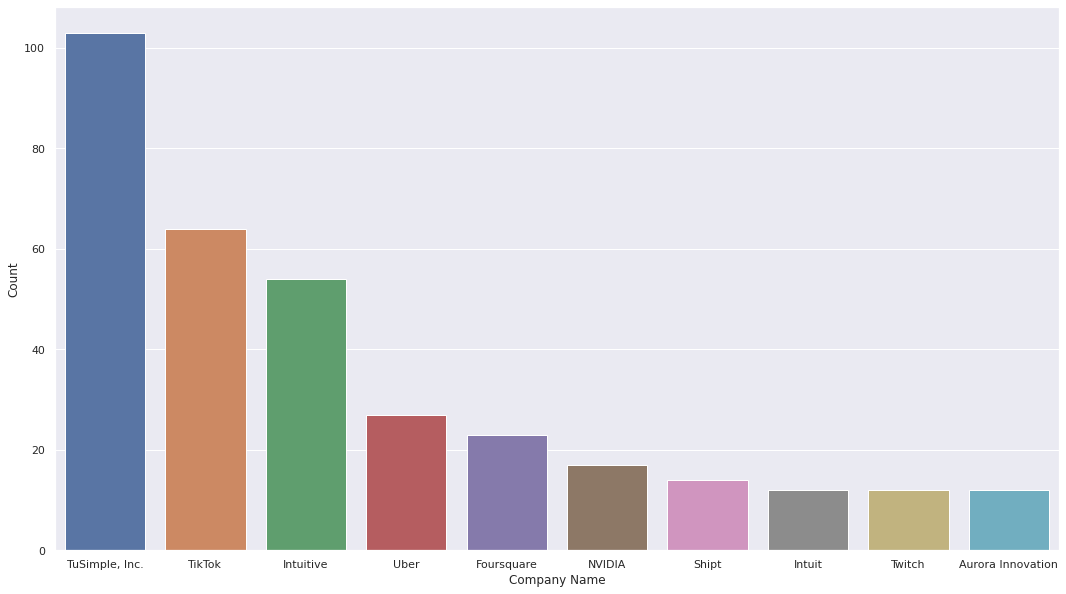

In [25]:
company_count = pd.DataFrame()
company_count = df_staff.loc[:,'Company'].value_counts()
company_count = company_count.to_frame()
company_count['Company Name'] = company_count.index
company_count = company_count.iloc[0:10 , :]
company_count = company_count.rename(columns = {'Company' : 'Count'})

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.barplot(data = company_count, x = 'Company Name', y = 'Count')
plt.show()

- Here, we show the `top-10` companies with largest count of staffs.

4. Visualisation for **`City`**

In [26]:
city = pd.DataFrame(df_staff["City"].value_counts())
city.describe()

,City
count,77.000000
mean,15.649351
std,46.309532
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,334.000000


- Similary, every city has a mean of only 2 employees, with 75% of cities having 6 or fewer employees. 
- Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

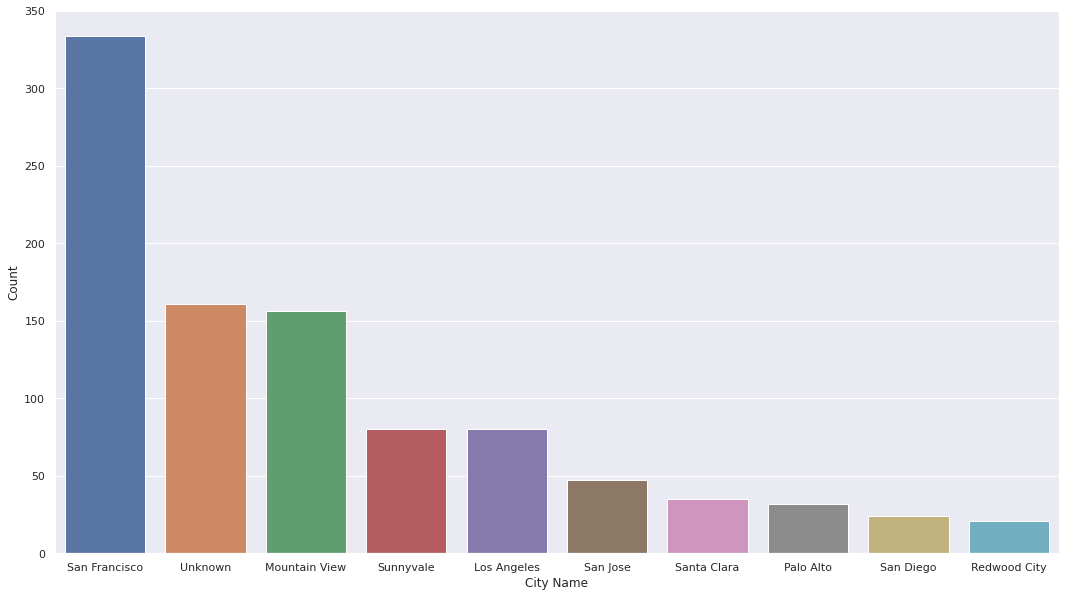

In [27]:
city_count = pd.DataFrame()
city_count = df_staff.loc[:,'City'].value_counts()
city_count = city_count.to_frame()
city_count['City Name'] = city_count.index
city_count = city_count.iloc[0:10 , :]
city_count = city_count.rename(columns = {'City' : 'Count'})

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.barplot(data = city_count, x = 'City Name', y = 'Count')
plt.show()

- Here, we show the `top-10` cities with largest count of workers.

5. Visualisation for **`Levels`**

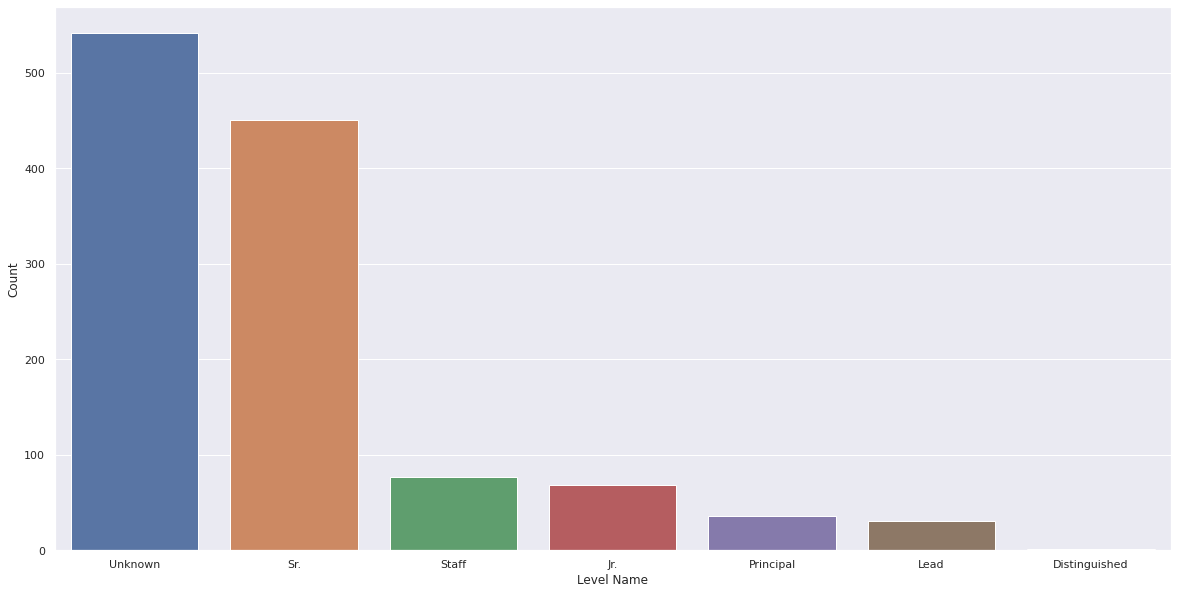

In [28]:
level_count = pd.DataFrame()
level_count = df_staff.loc[:,'Levels'].value_counts()
level_count = level_count.to_frame()
level_count['Level Name'] = level_count.index
level_count = level_count.rename(columns = {'Levels' : 'Count'})

plt.figure(figsize=(20, 10))
sns.set(font_scale = 1)
sns.barplot(data = level_count, x = 'Level Name', y = 'Count')
plt.show()

- The majority of levels are `Unknown`, which will then be predicted.
- Except `Unknown`, the level `Sr.` is the most common experience level for our dataset by a significant margin.

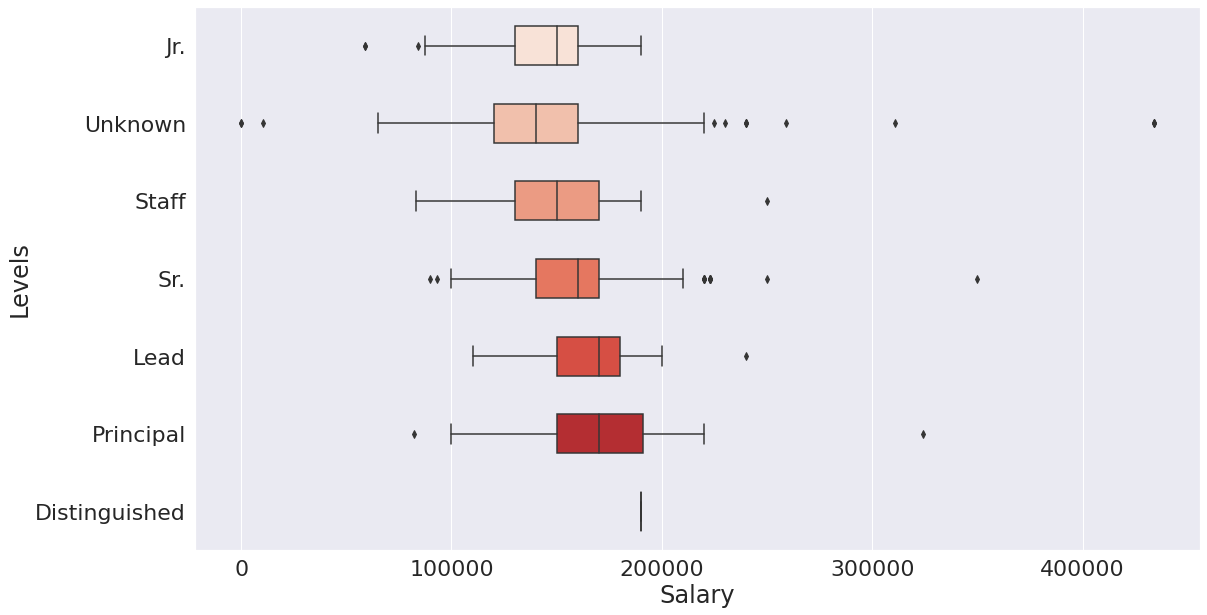

In [29]:
plt.figure(figsize=(18, 10))
sns.set(font_scale = 2)
sns.boxplot(y = 'Levels', x = 'Salary', data = df_staff, width = 0.5, palette="Reds")
plt.show()

6. Visualisation for **`Salary`**

<AxesSubplot:>

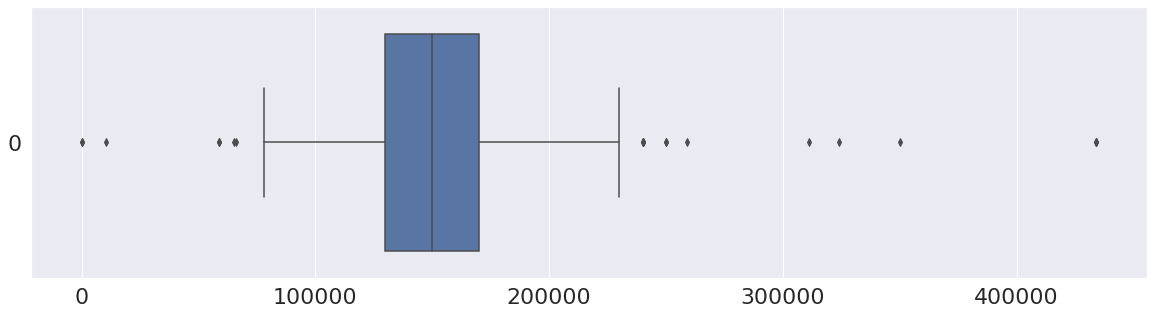

In [30]:
f, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(data = df_staff["Salary"], orient = "h")

- The vast majority of data points fall within `[130000, 170000]`, and mean is `150000`.
- However, there are 12 outliers which deviate significantly from the mean.

7. Visualisation for **`Skills`**

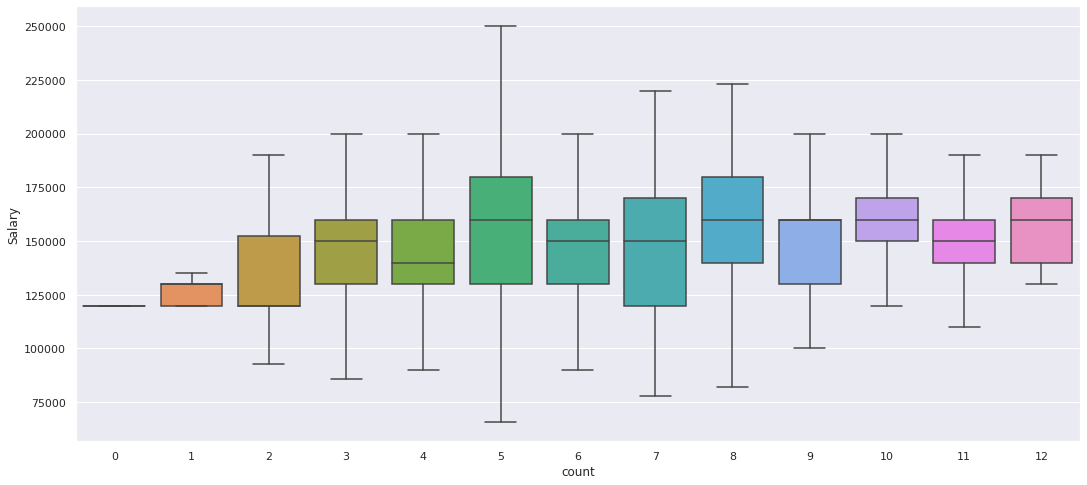

In [31]:
df_factors = df_staff
df_factors['count'] = df_factors.iloc[:,6:].sum(axis=1)
plt.figure(figsize=(18, 8))
sns.set(font_scale = 1)
sns.boxplot(x = "count", y = "Salary", data=df_factors, showfliers = False)
plt.show()

- Overall, with the increase of the count of skills, the salary of workers increases.

---

## 5. Preparation for Machine Learning

1. Drop the **`Company`** and **`City`** which are not suitable predictors for our model.

In [32]:
df = df_staff
df = df.drop(columns = ['Company', 'City'])
df.head(5)

,Job_ID,Title,Salary,Levels,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,...,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking,count
0,0,Data Scientist,110000,Jr.,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,10
1,1,Data Analyst,120000,Unknown,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,5
2,2,Data Scientist,150000,Staff,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7
3,3,Data Scientist,150000,Unknown,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,4,Data Scientist,130000,Jr.,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


2. Convert the **`Title`** and **`Levels`** from object to numeric data.

In [33]:
def change_obj_cols(se):
    value = se.unique().tolist()
    return se.map(pd.Series(range(len(value)), index = value)).values

for col in ['Title', 'Levels']:
    df[col] = change_obj_cols(df[col])

In [34]:
df.head(5)

,Job_ID,Title,Salary,Levels,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,...,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking,count
0,0,0,110000,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,10
1,1,1,120000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,5
2,2,0,150000,2,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7
3,3,0,150000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,4,0,130000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


3. Split the whole dataset into **`train`** and **`test`** datasets with the ratio 8 : 2.

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = False)

4. Save the tables into excel files.

In [36]:
train.to_excel('train.xlsx', index = False)
test.to_excel('test.xlsx', index = False)

---

## 6. Machine Learning Models

#### 1. Regression Tree

- Regression tree is a model which accepts categorial data as inputs and predicts a numeric output.

In [37]:
# import regression tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [38]:
# import train/test set
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

# split sets into predictor and reponse sets
train_X = train.drop(columns = ['Job_ID','Salary','count'])
train_y = pd.DataFrame(train['Salary'])

test_X = test.drop(columns = ['Job_ID','Salary','count'])
test_y = pd.DataFrame(test['Salary'])

[Text(0.6174013007465331, 0.98, 'Levels <= 1.5\nsquared_error = 1140854963.451\nsamples = 964\nvalue = 150626.604'),
 Text(0.3598968758379942, 0.94, 'Title <= 1.5\nsquared_error = 1307926686.717\nsamples = 486\nvalue = 140363.817'),
 Text(0.2894267281834202, 0.9, 'Title <= 0.5\nsquared_error = 594421596.99\nsamples = 288\nvalue = 128730.816'),
 Text(0.25216022927520687, 0.86, 'Scripting <= 0.5\nsquared_error = 529581831.253\nsamples = 278\nvalue = 129960.701'),
 Text(0.1923376206711615, 0.82, "Bachelor's degree <= 0.5\nsquared_error = 407972272.058\nsamples = 272\nvalue = 130856.893"),
 Text(0.11867912963530493, 0.78, 'Doctoral degree <= 0.5\nsquared_error = 281063315.215\nsamples = 159\nvalue = 135907.893'),
 Text(0.07163653079987742, 0.74, 'C <= 0.5\nsquared_error = 258130312.428\nsamples = 103\nvalue = 132547.136'),
 Text(0.058688323628562675, 0.7, 'Master of Science <= 0.5\nsquared_error = 211658224.852\nsamples = 65\nvalue = 128815.385'),
 Text(0.056236592093165796, 0.66, 'Fraud <

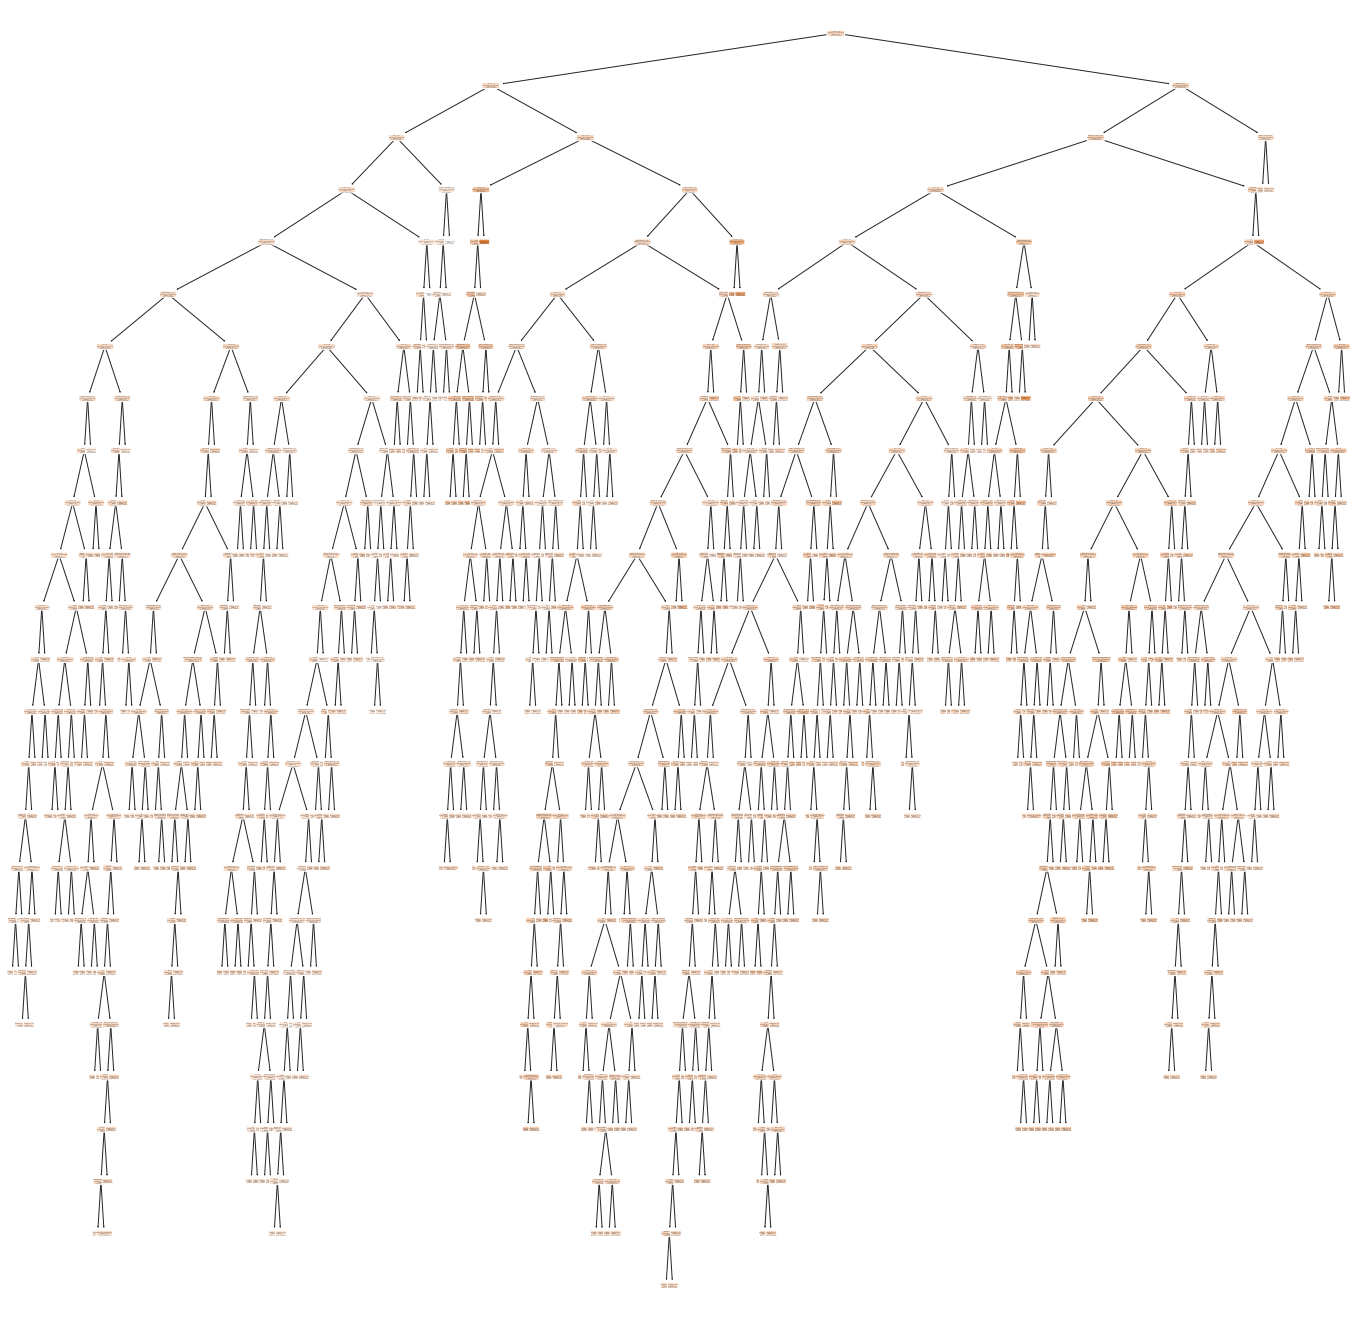

In [39]:
# create and fit regression tree
dectree = DecisionTreeRegressor()
dectree.fit(train_X, train_y)

# plot the trained decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, 
          filled=True, 
          rounded=True,
          feature_names= test_X.columns)

In [40]:
# predict test_y
test_y_pred = dectree.predict(test_X)

# evaluate prediction
mse = np.mean(np.square(np.array(test_y) - np.array(test_y_pred)))
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) :", rmse)

Root Mean Squared Error (RMSE) : 49514.719044590005


- Regression Tree is not a good model for our dataset.

---

#### 2. Neural Network

- Neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

In [41]:
# import tensorflow package
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

2022-03-27 00:45:35.254170: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2022-03-27 00:45:35.254246: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2022-03-27 00:45:35.254251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [42]:
# import train/test set
train = pd.read_excel('train.xlsx')
train = train.drop(['Job_ID'], axis = 1)

test = pd.read_excel('test.xlsx')
test = test.drop(['Job_ID'], axis = 1)

train_features = train.copy()
test_features = test.copy()

train_target = train_features.pop('Salary')
test_target = test_features.pop('Salary')

In [43]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(67, kernel_initializer='normal',input_dim = train_features.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

2022-03-27 00:45:36.263192: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-27 00:45:36.378391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:19:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-03-27 00:45:36.379101: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 1 with properties: 
pciBusID: 0000:1a:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-03-27 00:45:36.379781: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 2 with properties: 
pciBusID: 0000:67:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBan

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 67)                4556      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               17408     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 153,805
Trainable params: 153,805
Non-trainable params: 0
_________________________________________________________________


In [44]:
# train the NN_model
NN_model.fit(train_features, train_target, epochs=100, batch_size=32, validation_split = 0.2)

Train on 771 samples, validate on 193 samples
Epoch 1/100
 32/771 [>.............................] - ETA: 9s - loss: 144874.9688 - mean_absolute_error: 144874.9688

2022-03-27 00:45:37.692254: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


771/771 [==============================] - 1s 726us/sample - loss: 149770.8792 - mean_absolute_error: 149770.8750 - val_loss: 153890.2044 - val_mean_absolute_error: 153890.2031
Epoch 2/100
771/771 [==============================] - 0s 121us/sample - loss: 148838.7482 - mean_absolute_error: 148838.7656 - val_loss: 149938.3175 - val_mean_absolute_error: 149938.3281
Epoch 3/100
771/771 [==============================] - 0s 150us/sample - loss: 132131.0855 - mean_absolute_error: 132131.0938 - val_loss: 99028.6830 - val_mean_absolute_error: 99028.6719
Epoch 4/100
771/771 [==============================] - 0s 150us/sample - loss: 55931.2881 - mean_absolute_error: 55931.2891 - val_loss: 40290.3619 - val_mean_absolute_error: 40290.3594
Epoch 5/100
771/771 [==============================] - 0s 152us/sample - loss: 39648.5237 - mean_absolute_error: 39648.5273 - val_loss: 34851.4062 - val_mean_absolute_error: 34851.4062
Epoch 6/100
771/771 [==============================] - 0s 152us/sample - loss

771/771 [==============================] - 0s 153us/sample - loss: 19685.6868 - mean_absolute_error: 19685.6855 - val_loss: 15949.7176 - val_mean_absolute_error: 15949.7178
Epoch 46/100
771/771 [==============================] - 0s 150us/sample - loss: 19409.6868 - mean_absolute_error: 19409.6895 - val_loss: 15400.9762 - val_mean_absolute_error: 15400.9766
Epoch 47/100
771/771 [==============================] - 0s 150us/sample - loss: 19285.7169 - mean_absolute_error: 19285.7168 - val_loss: 15246.1044 - val_mean_absolute_error: 15246.1045
Epoch 48/100
771/771 [==============================] - 0s 148us/sample - loss: 19096.3239 - mean_absolute_error: 19096.3223 - val_loss: 15381.9597 - val_mean_absolute_error: 15381.9590
Epoch 49/100
771/771 [==============================] - 0s 151us/sample - loss: 19055.5082 - mean_absolute_error: 19055.5078 - val_loss: 15689.2286 - val_mean_absolute_error: 15689.2275
Epoch 50/100
771/771 [==============================] - 0s 151us/sample - loss: 188

771/771 [==============================] - 0s 147us/sample - loss: 16630.3220 - mean_absolute_error: 16630.3223 - val_loss: 14649.4777 - val_mean_absolute_error: 14649.4766
Epoch 90/100
771/771 [==============================] - 0s 153us/sample - loss: 16680.4890 - mean_absolute_error: 16680.4902 - val_loss: 15087.6087 - val_mean_absolute_error: 15087.6074
Epoch 91/100
771/771 [==============================] - 0s 152us/sample - loss: 16698.3125 - mean_absolute_error: 16698.3125 - val_loss: 14598.3259 - val_mean_absolute_error: 14598.3252
Epoch 92/100
771/771 [==============================] - 0s 154us/sample - loss: 16745.3982 - mean_absolute_error: 16745.4004 - val_loss: 14718.1000 - val_mean_absolute_error: 14718.0996
Epoch 93/100
771/771 [==============================] - 0s 154us/sample - loss: 16452.7416 - mean_absolute_error: 16452.7441 - val_loss: 14191.5636 - val_mean_absolute_error: 14191.5635
Epoch 94/100
771/771 [==============================] - 0s 152us/sample - loss: 164

In [45]:
# predict using the NN_model
predictions = NN_model.predict(test_features)
predict_result = pd.DataFrame(predictions, columns = ['Salary'])
test_result = test[['Salary']]

# evaluate prediction
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(test_result, predict_result)))

Root Mean Squared Error (RMSE) 	: 28595.120881160212


- Neural Network is a better model to predict the salary compared with the Regression Tree.

---

#### 3. Light GBM model

- Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [46]:
from sklearn.model_selection import KFold
import lightgbm as lgb
import datetime
import time

In [47]:
# import train/test set
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")
target = train['Salary']
del train['Salary']
features = [c for c in train.columns if c not in ['Job_ID']]
categorical_feats = ['Title', 'Levels']

- We then set the hyperparameters of the LGBM model, these parameters are obtained by an `bayesian optimization`.

In [48]:
# set the hyperparameters of the LGBM model
param = {'num_leavs' : 111,
         'min_data_in_leaf' : 149,
         'objective' : 'regression',
         'max_depth' : 9,
         'learning_rate' : 0.005,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse',
         'lambda_l1' : 0.2634,
         'random_state' : 133,
         'verbosity' : -1
        }

- We now train the LGBM model. Here, we use a standard KFold split of the dataset in order to validate the results and to stop the training.

In [49]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features],
                           label=target.iloc[trn_idx],
                           categorical_feature=categorical_feats
                          )
    val_data = lgb.Dataset(train.iloc[val_idx][features],
                           label=target.iloc[val_idx],
                           categorical_feature=categorical_feats
                          )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

fold n°0
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 30143.4	valid_1's rmse: 41125.3
[200]	training's rmse: 29175.6	valid_1's rmse: 40064.8
[300]	training's rmse: 28511.2	valid_1's rmse: 39332.8
[400]	training's rmse: 28164.6	valid_1's rmse: 38950.5
[500]	training's rmse: 27925.5	valid_1's rmse: 38737.5
[600]	training's rmse: 27767.9	valid_1's rmse: 38595.4
[700]	training's rmse: 27592.4	valid_1's rmse: 38475.8
[800]	training's rmse: 27471.2	valid_1's rmse: 38405
[900]	training's rmse: 27367.5	valid_1's rmse: 38356.4
[1000]	training's rmse: 27295.1	valid_1's rmse: 38312.2
[1100]	training's rmse: 27215.2	valid_1's rmse: 38288.7
[1200]	training's rmse: 27154.8	valid_1's rmse: 38275.5
[1300]	training's rmse: 27101.8	valid_1's rmse: 38255.7

/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-pack


[1400]	training's rmse: 27042.6	valid_1's rmse: 38240.1
[1500]	training's rmse: 26984.7	valid_1's rmse: 38205.8
[1600]	training's rmse: 26940.1	valid_1's rmse: 38178.8
[1700]	training's rmse: 26909.7	valid_1's rmse: 38170.6
[1800]	training's rmse: 26862.9	valid_1's rmse: 38146
[1900]	training's rmse: 26835.2	valid_1's rmse: 38136.8
[2000]	training's rmse: 26791.1	valid_1's rmse: 38109
[2100]	training's rmse: 26767.5	valid_1's rmse: 38105.2
[2200]	training's rmse: 26739.6	valid_1's rmse: 38102.3
[2300]	training's rmse: 26701.5	valid_1's rmse: 38083.1
[2400]	training's rmse: 26680.7	valid_1's rmse: 38074.9
[2500]	training's rmse: 26647	valid_1's rmse: 38062.9
[2600]	training's rmse: 26628.1	valid_1's rmse: 38067.9
[2700]	training's rmse: 26593.2	valid_1's rmse: 38046.8
[2800]	training's rmse: 26551	valid_1's rmse: 38009.1
[2900]	training's rmse: 26522.5	valid_1's rmse: 38010.6
[3000]	training's rmse: 26486	valid_1's rmse: 37987.4
[3100]	training's rmse: 26450.9	valid_1's rmse: 37960.3
[

[5900]	training's rmse: 28079.3	valid_1's rmse: 21964.2
[6000]	training's rmse: 28054	valid_1's rmse: 21936
[6100]	training's rmse: 28025.9	valid_1's rmse: 21925.9
[6200]	training's rmse: 27999.8	valid_1's rmse: 21905.1
[6300]	training's rmse: 27972.3	valid_1's rmse: 21894.3
[6400]	training's rmse: 27945.2	valid_1's rmse: 21864
[6500]	training's rmse: 27920.8	valid_1's rmse: 21846.7
[6600]	training's rmse: 27890.3	valid_1's rmse: 21867.1
Early stopping, best iteration is:
[6495]	training's rmse: 27922.5	valid_1's rmse: 21843.9
fold n°2
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 33370.5	valid_1's rmse: 29235.7
[200]	training's rmse: 32403.9	valid_1's rmse: 28252.6
[300]	training's rmse: 31702.8	valid_1's rmse: 27560.2
[400]	training's rmse: 31312.1	valid_1's rmse: 27141.1
[500]	training's rmse: 31055.7	valid_1's rmse: 26839.1
[600]	training's rmse: 30855.6	valid_1's rmse: 26609.8
[700]	training's

[1800]	training's rmse: 28284.8	valid_1's rmse: 31667
[1900]	training's rmse: 28215	valid_1's rmse: 31589.2
[2000]	training's rmse: 28144.1	valid_1's rmse: 31513.3
[2100]	training's rmse: 28066.2	valid_1's rmse: 31428.1
[2200]	training's rmse: 27985.9	valid_1's rmse: 31349.2
[2300]	training's rmse: 27904	valid_1's rmse: 31264.1
[2400]	training's rmse: 27847.5	valid_1's rmse: 31220
[2500]	training's rmse: 27789.2	valid_1's rmse: 31144.1
[2600]	training's rmse: 27728.1	valid_1's rmse: 31068.8
[2700]	training's rmse: 27678.8	valid_1's rmse: 31021.6
[2800]	training's rmse: 27619.3	valid_1's rmse: 30958.1
[2900]	training's rmse: 27569.1	valid_1's rmse: 30901.4
[3000]	training's rmse: 27517.7	valid_1's rmse: 30849.1
[3100]	training's rmse: 27470.6	valid_1's rmse: 30799.4
[3200]	training's rmse: 27412.3	valid_1's rmse: 30748.8
[3300]	training's rmse: 27367.1	valid_1's rmse: 30696.8
[3400]	training's rmse: 27325	valid_1's rmse: 30646.9
[3500]	training's rmse: 27288.5	valid_1's rmse: 30626.8
[3

In [50]:
print("Root Mean Squared Error (RMSE) 	: {}".format(mean_squared_error(predictions, test['Salary'])**0.5))

Root Mean Squared Error (RMSE) 	: 25052.966200269588


- Using LGBM model, we obtain a higher accuracy in predicting the salary.

---

## 7. Insights Analysis

1. Analyze the `importance` of skills that can be of help in increasing the salary.

- Here we list the **Top-8** important skills

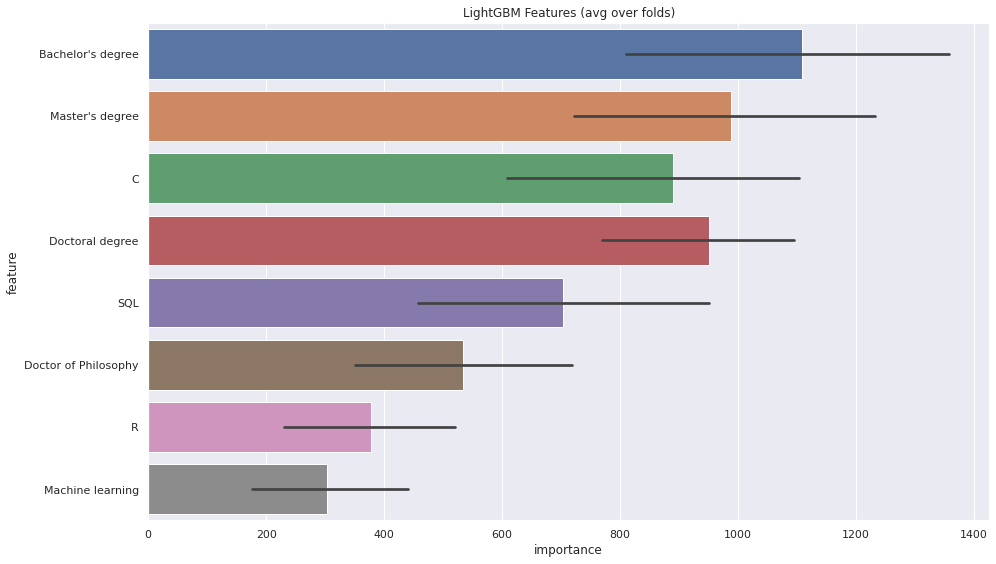

In [51]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[3:11].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14, 8))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

2. Find the `anomalies` of salary among the staffs.

In [52]:
df_a = pd.DataFrame({"Job_ID" : test["Job_ID"].values})
df_a["real"] = test['Salary']
df_a["predict"] = predictions
df_a['ratio'] = df_a['predict'] / df_a['real']

<AxesSubplot:xlabel='ratio', ylabel='Count'>

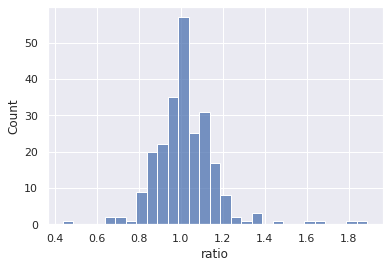

In [53]:
sns.histplot(df_a['ratio'], binwidth = 0.05)

- Basically, the histgram of predict/real ratios is similar to the normal distribution, hence we set a 90% `confidential interval` for the ratios.

In [54]:
LL = df_a['ratio'].quantile(0.05)
UL = df_a['ratio'].quantile(0.95)
print("5% percentile of ratios : {}".format(LL))
print("95% percentile of ratios : {}".format(UL))
print("The 90% confidential interval is [{}, {}]".format(LL, UL))

5% percentile of ratios : 0.8292261102096298
95% percentile of ratios : 1.2349846943032237
The 90% confidential interval is [0.8292261102096298, 1.2349846943032237]


In [55]:
df_a = df_a[(df_a['ratio'] < LL) | (df_a['ratio'] > UL)]
df_a

,Job_ID,real,predict,ratio
8,1034,180000,134051.133201,0.744729
55,1086,85000,141457.660596,1.664208
71,1103,170000,140067.678405,0.823928
77,1109,203221,167140.997403,0.822459
80,1112,220000,177392.829869,0.806331
103,1137,110000,144020.913949,1.309281
104,1138,83000,132295.878851,1.593926
112,1146,210000,172665.549936,0.822217
116,1151,190000,137008.183554,0.721096
125,1160,130000,175071.178384,1.346701
